# Case Study:Data Preprocessing

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [3]:
df=data.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [4]:
df.shape

(891, 11)

In [5]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


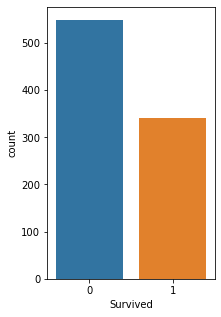

In [12]:
plt.figure(figsize=(3, 5))
sns.countplot(x='Survived', data=df)
plt.show()

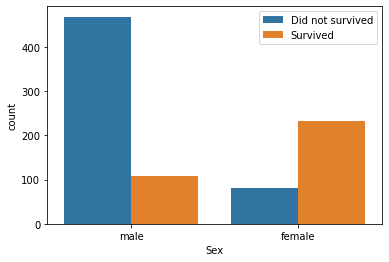

In [13]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.legend(['Did not survived', 'Survived'])

In [14]:
df.select_dtypes(exclude='object').columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

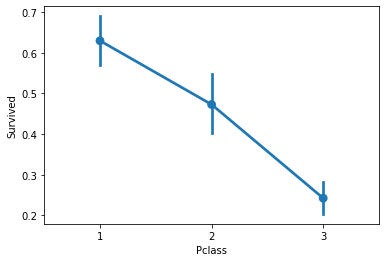

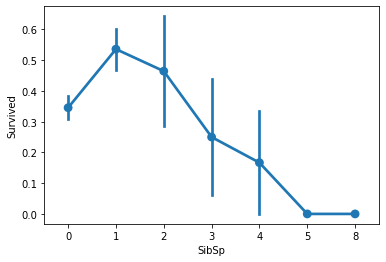

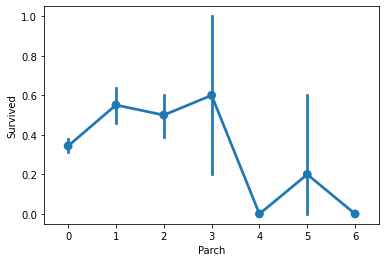

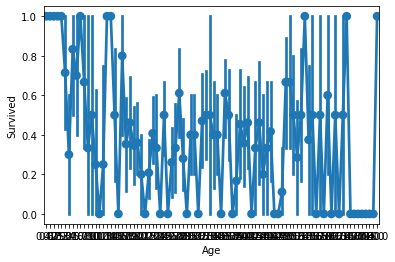

In [15]:
# Understand relation between each feature and target
for i,c in enumerate(['Pclass', 'SibSp', 'Parch','Age']):
    plt.figure(i)
    sns.pointplot(data=df, x=c, y='Survived')

In [16]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

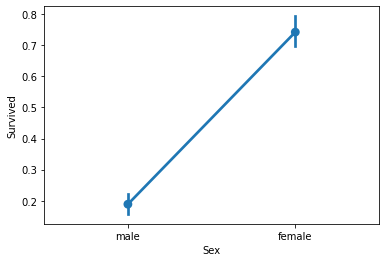

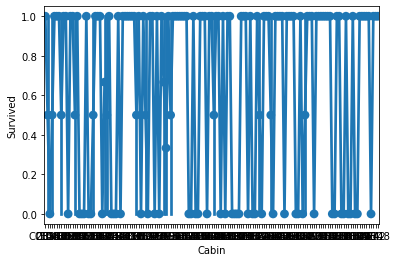

In [17]:
for i,c in enumerate([ 'Sex', 'Cabin']):
    plt.figure(i)
    sns.pointplot(data=df, x=c, y= 'Survived')

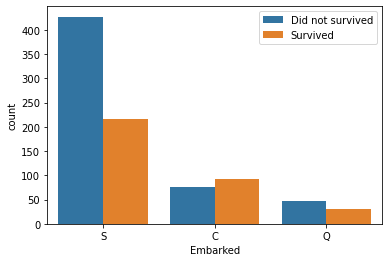

In [18]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.legend(['Did not survived', 'Survived'])

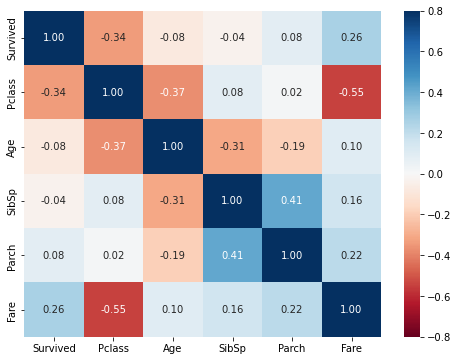

In [19]:
plt.figure(figsize=(8, 6))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdBu', vmax=0.8, vmin=-0.8)
plt.show()

we can see the relation between the datasets it is noted that SibSp and Parch 
are having higher correlation compared to the other columns

In [20]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

## 4. Fill in all the missing values present in all the columns in the dataset

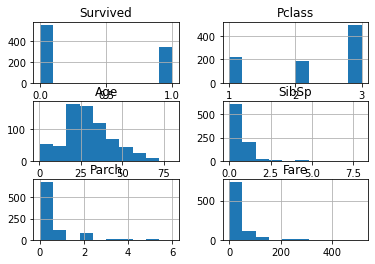

<Figure size 720x720 with 0 Axes>

In [21]:
df.hist()
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

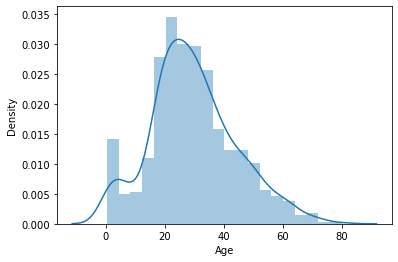

In [22]:
sns.distplot(df['Age'])

its seen that the data is right skewed,so using median we will fill the missing values

In [23]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Age'].isna().sum()

0

In [24]:
#for 'Cabin' there are 687 missing values which is huge so filling it with a new catogory variable'unknown'
df['Cabin']=df['Cabin'].fillna('Unknown')
df['Cabin'].isna().sum()

0

<AxesSubplot:xlabel='Embarked', ylabel='count'>

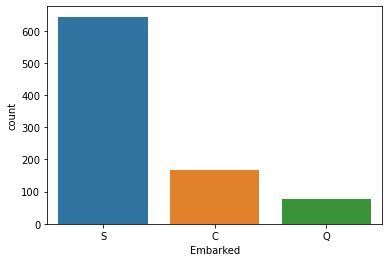

In [25]:
plt.figure()
sns.countplot(data=df,x="Embarked")

In [26]:
#'Embarked' is a categorical column,so missing values are replaced with most frequent category
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'].isna().sum()

0

## 5. Check and handle outliers in at least 3 columns in the dataset

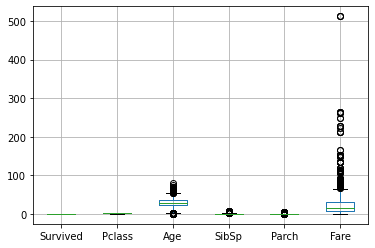

In [27]:
df.boxplot()
plt.show()

#### handling missing value for'SibSp'

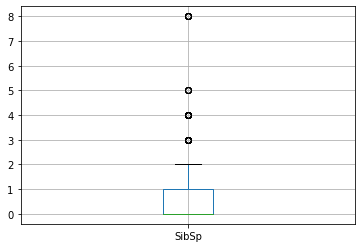

In [28]:
df[['SibSp']].boxplot()
plt.show()

In [29]:
#calculating interquartile range(IQR)
q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
IQR=q3-q1

low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Lower limit : ',low_lim)
print('Upper limit : ',up_lim)

Lower limit :  -1.5
Upper limit :  2.5


In [30]:
outlier=[]
for x in df['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [31]:
out_idx=df['SibSp']>up_lim
df.loc[out_idx].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [32]:
df.drop([8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

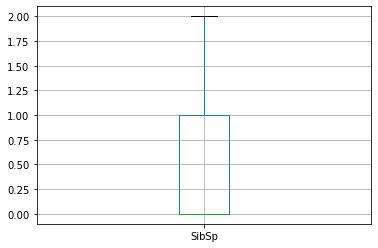

In [33]:
df[['SibSp']].boxplot()
plt.show()

In [34]:
df.shape

(845, 11)

#### handling missing value for'Age'

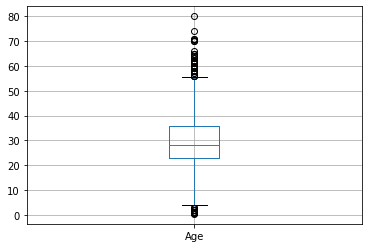

In [35]:
df[['Age']].boxplot()
plt.show()

In [36]:
#calculating interquartile range(IQR)
q1=np.percentile(df['Age'],25,interpolation='midpoint')
q2=np.percentile(df['Age'],50,interpolation='midpoint')
q3=np.percentile(df['Age'],75,interpolation='midpoint')
IQR=q3-q1

low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Lower limit : ',low_lim)
print('Upper limit : ',up_lim)

Lower limit :  3.5
Upper limit :  55.5


In [37]:
outlier=[]
for x in df['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [38]:
out_idx=df['Age']<low_lim
df.loc[out_idx].index

Int64Index([ 44,  79, 173, 184, 194, 206, 298, 306, 341, 349, 382, 408, 470,
            480, 531, 645, 756, 789, 804, 828, 832],
           dtype='int64', name='PassengerId')

In [39]:
out_idx=df['Age']>up_lim
df.loc[out_idx].index

Int64Index([ 12,  34,  55,  95,  97, 117, 171, 175, 196, 233, 253, 269, 276,
            281, 327, 367, 439, 457, 468, 484, 488, 494, 546, 556, 571, 588,
            626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880],
           dtype='int64', name='PassengerId')

In [40]:
df.drop([ 44, 79, 173, 184, 194, 206, 298, 306, 341, 349, 382, 408, 470,
            480, 531, 645, 756, 789, 804, 828, 832,12,  34,  55,  95,  97, 117, 171, 175, 196, 233, 253, 269, 276,
            281, 327, 367, 439, 457, 468, 484, 488, 494, 546, 556, 571, 588,
            626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880],inplace=True)

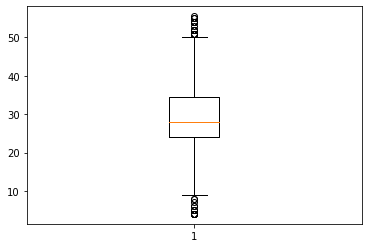

In [41]:
plt.boxplot(df['Age'])
plt.show()

In [42]:
df.shape

(785, 11)

#### Handling missing value for 'Fare'

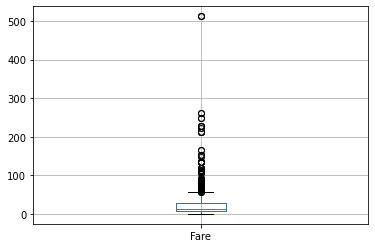

In [43]:
df[['Fare']].boxplot()
plt.show()

In [44]:
#calculating interquartile range(IQR)
q1=np.percentile(df['Fare'],25,interpolation='midpoint')
q2=np.percentile(df['Fare'],50,interpolation='midpoint')
q3=np.percentile(df['Fare'],75,interpolation='midpoint')
IQR=q3-q1
low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Lower limit : ',low_lim)
print('Upper limit : ',up_lim)

Lower limit :  -21.885499999999997
Upper limit :  57.5313


In [45]:
outlier=[]
for x in df['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [46]:
out_idx=df['Fare']>up_lim
df.loc[out_idx].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

In [47]:
df.drop((df.loc[out_idx].index),inplace=True)

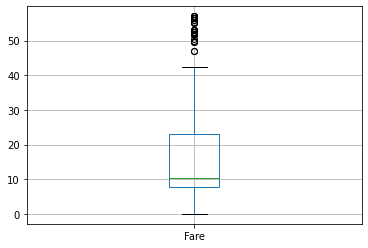

In [48]:
df[['Fare']].boxplot()
plt.show()

In [49]:
df.shape

(683, 11)

 ## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [50]:
#we need to convert categorical data in to numeric form by using onehot encoding
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [51]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
X = df.drop(['Survived','Name','Ticket','Cabin'],axis =1)
y = df['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,1
3,3,26.0,0,0,7.9250,0,0,1
4,1,35.0,1,0,53.1000,0,0,1
5,3,35.0,0,0,8.0500,1,0,1
6,3,28.0,0,0,8.4583,1,1,0


In [52]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2.503660,28.879209,0.266471,0.260615,16.271357,0.689605,0.099561,0.755490
std,0.717135,9.402243,0.498535,0.751938,12.593427,0.462995,0.299633,0.430111
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,24.000000,0.000000,0.000000,7.854200,0.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,0.000000,10.500000,1.000000,0.000000,1.000000
75%,3.000000,33.000000,0.000000,0.000000,23.000000,1.000000,0.000000,1.000000
max,3.000000,55.500000,2.000000,6.000000,57.000000,1.000000,1.000000,1.000000


In [53]:
X=mms.fit_transform(X)
X=pd.DataFrame(X)

In [54]:
X.describe()

,0,1,2,3,4,5,6,7
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.751830,0.483091,0.133236,0.043436,0.285462,0.689605,0.099561,0.755490
std,0.358568,0.182568,0.249267,0.125323,0.220937,0.462995,0.299633,0.430111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.388350,0.000000,0.000000,0.137793,0.000000,0.000000,1.000000
50%,1.000000,0.466019,0.000000,0.000000,0.184211,1.000000,0.000000,1.000000
75%,1.000000,0.563107,0.000000,0.000000,0.403509,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
